Héctor Asorey de Pablos

<hr>

# TRABAJO 1: OPTIMIZACIÓN DE HIPERPARÁMETROS

<hr>

Se plantea un problema de clasificación multiclase (3 clases) a resolver con alguno de los meta-algoritmos de aprendizaje o redes neuronales vistos en clase, utilizando optimización de hiperparámetros. Se compararán los modelos obtenidos en las prácticas anteriores con los modelos que se obtienen utilizando la optimización de hiperparámetros

Para esta tarea, se utilizará el dataset "star_class_clean.csv", que contiene 100000 observaciones del espacio tomadas por el SDSS (Sloan Digital Sky Survey) y que clasifica estas observaciones en 3 tipos, que son: Galaxia, Estrella o Cuásar (galaxia recién nacida).

El dataset contiene 13 variables, que son las siguientes:

* alpha: ángulo de ascensión (float)
* delta: ángulo de declinación (float)
* u: filtro ultravioleta (float)
* g: filtro verde (float)
* r: filtro rojo (float)
* i: filtro infrarrojo cercano (float)
* z: filtro infrarrojo (float)
* field_ID: número de campo para identificar cada campo (int)
* spec_obj_ID: ID único utilizado para objetos espectroscópicos ópticos (int)
* redshift: valor redshift basado en el aumento de la longitud de onda (float)
* plate: identifica cada placa en SDSS (int)
* MJD: fecha juliana (float)
* fiber_ID: ID de fibra que identifica la fibra que apuntó la luza al plano focal en cada observación
* class: clase del objeto (galaxy, star, quasar object)

Este Dataset ha sido descargado de Kaggle y se han eliminado las columnas que no son relevantes para resolver el problema de clasificación. 

Fuente del Dataset:https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

<hr>

### 1. LECTURA DE DATOS Y VISUALIZACIÓN DE LA DISTRIBUCIÓN DE LAS CLASES A CLASIFICAR



In [1]:
import pandas as pd

dataframe = pd.read_csv('star_class_clean.csv')
dataframe

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,6.891865e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,581,1.055431e+19,0.000000,9374,57749,438,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,289,8.586351e+18,0.404895,7626,56934,866,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,308,3.112008e+18,0.143366,2764,54535,74,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,131,7.601080e+18,0.455040,6751,56368,470,GALAXY


In [2]:
dataframe['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [3]:
print(f'Número de valores únicos en field_ID: {len(dataframe["field_ID"].unique())}')
print(f'Número de valores únicos en spec_obj_ID: {len(dataframe["spec_obj_ID"].unique())}')
print(f'Número de valores únicos en redshift: {len(dataframe["redshift"].unique())}')
print(f'Número de valores únicos en plate: {len(dataframe["plate"].unique())}')      
print(f'Número de valores únicos en fiber_ID: {len(dataframe["fiber_ID"].unique())}')      

Número de valores únicos en field_ID: 856
Número de valores únicos en spec_obj_ID: 100000
Número de valores únicos en redshift: 99295
Número de valores únicos en plate: 6284
Número de valores únicos en fiber_ID: 1000


Nº de elementos de la clase Galaxia: 59445
Nº de elementos de la clase Cuasar: 18961
Nº de elementos de la clase Estrella: 21594


<Axes: xlabel='class', ylabel='Probability'>

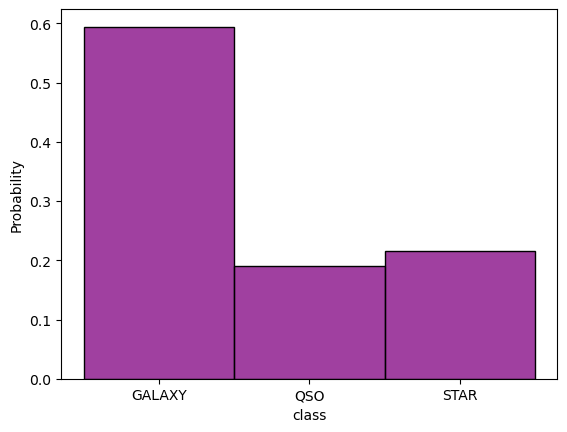

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Nº de elementos de la clase Galaxia: {}'.format(np.count_nonzero(dataframe['class'] == 'GALAXY')))
print('Nº de elementos de la clase Cuasar: {}'.format(np.count_nonzero(dataframe['class'] == 'QSO')))
print('Nº de elementos de la clase Estrella: {}'.format(np.count_nonzero(dataframe['class'] == 'STAR')))

sns.histplot(data=dataframe, x="class", discrete=True, stat='probability', bins=2, color = 'purple')

<hr>

### 2. TRANSFORMACIÓN DE LOS DATOS



In [5]:
dataframe.dtypes

alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
field_ID         int64
spec_obj_ID    float64
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
class           object
dtype: object

In [6]:
dataframe = dataframe.drop(['spec_obj_ID'], axis = 1)

In [7]:
from sklearn import preprocessing

classValues = dataframe['class'].values

le = preprocessing.LabelEncoder()     
classLabelized = le.fit_transform(classValues)

dataframe['class'] = classLabelized

In [8]:
dataframe['class'].unique()

array([0, 1, 2])

<hr>

### 3. EVALUACIÓN HOLD-OUT



In [9]:
from sklearn.model_selection import train_test_split

X = dataframe.drop('class', axis=1, inplace=False).values
y = dataframe['class'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<hr>

### 4. OPTIMIZACIÓN DE HIPERPARÁMETROS PARA LGBM



In [10]:
import numpy as np
import optuna
import lightgbm as lgbm
from sklearn.metrics import precision_score

COMMON_PARAMS = {"boosting_type": 'gbdt',
                 "objective": 'multiclass',
                 "class_weight": "balanced",
                 "random_state": 0}

def lgbm_objective(trial, X_train, y_train, X_test, y_test):


    param_grid = {"n_estimators": trial.suggest_int("n_estimators", 100, 600),
                  "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
                  "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
                  "max_depth": trial.suggest_int("max_depth", 3, 12),
                  "bagging_fraction": trial.suggest_float("bagging_fraction", 0.2, 0.95),
                  "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95),
                  "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
                  "min_child_samples": trial.suggest_int("min_child_samples", 5, 100)
                 }
    

    lgbm_class = lgbm.LGBMClassifier(**COMMON_PARAMS, **param_grid)
    

    lgbm_class.fit(X_train, y_train)
    

    return precision_score(y_true=y_test, y_pred=lgbm_class.predict(X_test), average = "macro")



trial = [] 
study = optuna.create_study(direction="maximize", 
                            study_name="LGBM Classifier", 
                            sampler=optuna.samplers.TPESampler(seed=0), 
                            pruner=optuna.pruners.HyperbandPruner())
func = lambda trial: lgbm_objective(trial=trial, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
study.optimize(func, n_trials=20)

[I 2023-04-16 10:55:10,282] A new study created in memory with name: LGBM Classifier


[LightGBM] [Warning] bagging_fraction is set=0.5177410995041785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5177410995041785
[LightGBM] [Warning] feature_fraction is set=0.684420584799992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.684420584799992
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-04-16 10:55:17,790] Trial 0 finished with value: 0.9765563955052304 and parameters: {'n_estimators': 374, 'learning_rate': 0.21740491624800165, 'num_leaves': 1820, 'max_depth': 8, 'bagging_fraction': 0.5177410995041785, 'feature_fraction': 0.684420584799992, 'bagging_freq': 4, 'min_child_samples': 90}. Best is trial 0 with value: 0.9765563955052304.


[LightGBM] [Warning] bagging_fraction is set=0.6260334208204492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6260334208204492
[LightGBM] [Warning] feature_fraction is set=0.8941974787194957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8941974787194957
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-16 10:55:29,404] Trial 1 finished with value: 0.9784257759260152 and parameters: {'n_estimators': 582, 'learning_rate': 0.12119804045947552, 'num_leaves': 2380, 'max_depth': 8, 'bagging_fraction': 0.6260334208204492, 'feature_fraction': 0.8941974787194957, 'bagging_freq': 1, 'min_child_samples': 13}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.9339637566745731, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9339637566745731
[LightGBM] [Warning] feature_fraction is set=0.7993689231625427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7993689231625427
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-04-16 10:55:32,298] Trial 2 finished with value: 0.9771699140594502 and parameters: {'n_estimators': 110, 'learning_rate': 0.251459755208902, 'num_leaves': 2340, 'max_depth': 11, 'bagging_fraction': 0.9339637566745731, 'feature_fraction': 0.7993689231625427, 'bagging_freq': 4, 'min_child_samples': 79}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.5913862413125537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5913862413125537
[LightGBM] [Warning] feature_fraction is set=0.5109964549928927, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5109964549928927
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-04-16 10:55:37,560] Trial 3 finished with value: 0.9763535325021772 and parameters: {'n_estimators': 159, 'learning_rate': 0.1955770961849819, 'num_leaves': 440, 'max_depth': 12, 'bagging_fraction': 0.5913862413125537, 'feature_fraction': 0.5109964549928927, 'bagging_freq': 2, 'min_child_samples': 79}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.6590717920418161, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6590717920418161
[LightGBM] [Warning] feature_fraction is set=0.6627004976560678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6627004976560678
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-04-16 10:55:41,405] Trial 4 finished with value: 0.9763807727496431 and parameters: {'n_estimators': 328, 'learning_rate': 0.17484584517190807, 'num_leaves': 60, 'max_depth': 9, 'bagging_fraction': 0.6590717920418161, 'feature_fraction': 0.6627004976560678, 'bagging_freq': 7, 'min_child_samples': 70}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.7000750365842507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7000750365842507
[LightGBM] [Warning] feature_fraction is set=0.7029784022136196, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7029784022136196
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-04-16 10:55:42,497] Trial 5 finished with value: 0.9682648328975506 and parameters: {'n_estimators': 280, 'learning_rate': 0.13673926660180902, 'num_leaves': 2100, 'max_depth': 3, 'bagging_fraction': 0.7000750365842507, 'feature_fraction': 0.7029784022136196, 'bagging_freq': 2, 'min_child_samples': 17}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.9412803785444197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9412803785444197
[LightGBM] [Warning] feature_fraction is set=0.27653360806102106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27653360806102106
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-04-16 10:55:44,946] Trial 6 finished with value: 0.9738424295558316 and parameters: {'n_estimators': 258, 'learning_rate': 0.11547612357336054, 'num_leaves': 1720, 'max_depth': 7, 'bagging_fraction': 0.9412803785444197, 'feature_fraction': 0.27653360806102106, 'bagging_freq': 2, 'min_child_samples': 20}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.31922718773413983, subsample=1.0 will be ignored. Current value: bagging_fraction=0.31922718773413983
[LightGBM] [Warning] feature_fraction is set=0.28278135587322883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28278135587322883
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-04-16 10:55:47,103] Trial 7 finished with value: 0.9706778548223811 and parameters: {'n_estimators': 427, 'learning_rate': 0.0834545647365368, 'num_leaves': 1400, 'max_depth': 5, 'bagging_fraction': 0.31922718773413983, 'feature_fraction': 0.28278135587322883, 'bagging_freq': 5, 'min_child_samples': 18}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.828458680624103, subsample=1.0 will be ignored. Current value: bagging_fraction=0.828458680624103
[LightGBM] [Warning] feature_fraction is set=0.2720738059204723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2720738059204723
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-04-16 10:55:47,933] Trial 8 finished with value: 0.9650317816077405 and parameters: {'n_estimators': 198, 'learning_rate': 0.11693029949167957, 'num_leaves': 2480, 'max_depth': 3, 'bagging_fraction': 0.828458680624103, 'feature_fraction': 0.2720738059204723, 'bagging_freq': 7, 'min_child_samples': 49}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.4121052219323072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4121052219323072
[LightGBM] [Warning] feature_fraction is set=0.29014742090987666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29014742090987666
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-04-16 10:55:49,797] Trial 9 finished with value: 0.9683498587748686 and parameters: {'n_estimators': 589, 'learning_rate': 0.18540520072606334, 'num_leaves': 2220, 'max_depth': 3, 'bagging_fraction': 0.4121052219323072, 'feature_fraction': 0.29014742090987666, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.2207920199359764, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2207920199359764
[LightGBM] [Warning] feature_fraction is set=0.9418306788838815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9418306788838815
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-16 10:55:53,295] Trial 10 finished with value: 0.9716066584983719 and parameters: {'n_estimators': 584, 'learning_rate': 0.02428252791947283, 'num_leaves': 2860, 'max_depth': 6, 'bagging_fraction': 0.2207920199359764, 'feature_fraction': 0.9418306788838815, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.8028572769786828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8028572769786828
[LightGBM] [Warning] feature_fraction is set=0.9337416196821833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9337416196821833
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-04-16 10:55:55,598] Trial 11 finished with value: 0.9765325792021086 and parameters: {'n_estimators': 106, 'learning_rate': 0.282155577350132, 'num_leaves': 1200, 'max_depth': 11, 'bagging_fraction': 0.8028572769786828, 'feature_fraction': 0.9337416196821833, 'bagging_freq': 4, 'min_child_samples': 65}. Best is trial 1 with value: 0.9784257759260152.


[LightGBM] [Warning] bagging_fraction is set=0.9256432549161735, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9256432549161735
[LightGBM] [Warning] feature_fraction is set=0.8343763460025109, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8343763460025109
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-04-16 10:56:00,992] Trial 12 finished with value: 0.9787709724061693 and parameters: {'n_estimators': 485, 'learning_rate': 0.2537601369581455, 'num_leaves': 2840, 'max_depth': 9, 'bagging_fraction': 0.9256432549161735, 'feature_fraction': 0.8343763460025109, 'bagging_freq': 5, 'min_child_samples': 97}. Best is trial 12 with value: 0.9787709724061693.


[LightGBM] [Warning] bagging_fraction is set=0.7573920016837394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7573920016837394
[LightGBM] [Warning] feature_fraction is set=0.862631214896834, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.862631214896834
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-04-16 10:56:06,126] Trial 13 finished with value: 0.9784875234419893 and parameters: {'n_estimators': 498, 'learning_rate': 0.28909090875290466, 'num_leaves': 2960, 'max_depth': 9, 'bagging_fraction': 0.7573920016837394, 'feature_fraction': 0.862631214896834, 'bagging_freq': 6, 'min_child_samples': 100}. Best is trial 12 with value: 0.9787709724061693.


[LightGBM] [Warning] bagging_fraction is set=0.8044246294001893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8044246294001893
[LightGBM] [Warning] feature_fraction is set=0.8209127945602737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8209127945602737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-04-16 10:56:11,918] Trial 14 finished with value: 0.9783943553705439 and parameters: {'n_estimators': 481, 'learning_rate': 0.2979798819109028, 'num_leaves': 2940, 'max_depth': 10, 'bagging_fraction': 0.8044246294001893, 'feature_fraction': 0.8209127945602737, 'bagging_freq': 6, 'min_child_samples': 96}. Best is trial 12 with value: 0.9787709724061693.


[LightGBM] [Warning] bagging_fraction is set=0.7372069483477599, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7372069483477599
[LightGBM] [Warning] feature_fraction is set=0.8139420822096901, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139420822096901
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-04-16 10:56:17,203] Trial 15 finished with value: 0.978203758878973 and parameters: {'n_estimators': 491, 'learning_rate': 0.24703367667683768, 'num_leaves': 2960, 'max_depth': 9, 'bagging_fraction': 0.7372069483477599, 'feature_fraction': 0.8139420822096901, 'bagging_freq': 6, 'min_child_samples': 100}. Best is trial 12 with value: 0.9787709724061693.


[LightGBM] [Warning] bagging_fraction is set=0.8711619022358121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8711619022358121
[LightGBM] [Warning] feature_fraction is set=0.5421527533945347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5421527533945347
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-04-16 10:56:24,126] Trial 16 finished with value: 0.9785412688257339 and parameters: {'n_estimators': 497, 'learning_rate': 0.26122958684717956, 'num_leaves': 920, 'max_depth': 10, 'bagging_fraction': 0.8711619022358121, 'feature_fraction': 0.5421527533945347, 'bagging_freq': 5, 'min_child_samples': 33}. Best is trial 12 with value: 0.9787709724061693.


[LightGBM] [Warning] bagging_fraction is set=0.8794237239900561, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8794237239900561
[LightGBM] [Warning] feature_fraction is set=0.47889178296586726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47889178296586726
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-04-16 10:56:31,643] Trial 17 finished with value: 0.9784796543119884 and parameters: {'n_estimators': 404, 'learning_rate': 0.23201628527590776, 'num_leaves': 800, 'max_depth': 12, 'bagging_fraction': 0.8794237239900561, 'feature_fraction': 0.47889178296586726, 'bagging_freq': 5, 'min_child_samples': 36}. Best is trial 12 with value: 0.9787709724061693.


[LightGBM] [Warning] bagging_fraction is set=0.8731216870471661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8731216870471661
[LightGBM] [Warning] feature_fraction is set=0.5834995808198223, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5834995808198223
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-04-16 10:56:37,486] Trial 18 finished with value: 0.9785839563092612 and parameters: {'n_estimators': 451, 'learning_rate': 0.2638446117744331, 'num_leaves': 1020, 'max_depth': 10, 'bagging_fraction': 0.8731216870471661, 'feature_fraction': 0.5834995808198223, 'bagging_freq': 5, 'min_child_samples': 28}. Best is trial 12 with value: 0.9787709724061693.


[LightGBM] [Warning] bagging_fraction is set=0.9455167919132039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9455167919132039
[LightGBM] [Warning] feature_fraction is set=0.43651770317293637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43651770317293637
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-04-16 10:56:41,385] Trial 19 finished with value: 0.9778755536111828 and parameters: {'n_estimators': 420, 'learning_rate': 0.21882078534676036, 'num_leaves': 1040, 'max_depth': 7, 'bagging_fraction': 0.9455167919132039, 'feature_fraction': 0.43651770317293637, 'bagging_freq': 3, 'min_child_samples': 35}. Best is trial 12 with value: 0.9787709724061693.


In [11]:
print("Number of finished trials: {}".format(len(study.trials)))


print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = {**COMMON_PARAMS, **trial.params}
for key, value in params.items():
    print("\t{}: {}".format(key, value))

Number of finished trials: 20
Best trial:
  Value: 0.9787709724061693
  Params: 
	boosting_type: gbdt
	objective: multiclass
	class_weight: balanced
	random_state: 0
	n_estimators: 485
	learning_rate: 0.2537601369581455
	num_leaves: 2840
	max_depth: 9
	bagging_fraction: 0.9256432549161735
	feature_fraction: 0.8343763460025109
	bagging_freq: 5
	min_child_samples: 97


<hr>

### 5. ENTRENAMIENTO DEL ENSEMBLE  OPTIMIZADO Y EL ENSEMBLE MANUAL CON MEJOR RENDIMIENTO



In [12]:
modelLGBM = lgbm.LGBMClassifier(boosting_type ='gbdt',
                       num_leaves=31,
                       max_depth=-1,
                       learning_rate=0.1,
                       n_estimators=100,
                       subsample_for_bin=200000,
                       objective='multiclass',
                       class_weight='balanced',
                       min_split_gain=0,
                       min_child_weight=0.001,
                       min_child_samples=20,
                       subsample=1,
                       subsample_freq=0,
                       colsample_bytree=1,
                       reg_alpha=0,
                       reg_lambda=0)

modelLGBMOptimized = lgbm.LGBMClassifier(**params)

In [13]:
modelosEnsemble = {
           'Ensemble LGBM not optimized': modelLGBM,
           'Ensemble LGBM optimized':modelLGBMOptimized
}


for k, v in modelosEnsemble.items():
        v.fit(X_train, y_train)

<hr>

### 6. EVALUACIÓN DE LOS MÉTODOS ENSEMBLE



In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

evaluacion = list()

for k, v in modelosEnsemble.items():
    print ('EVALUANDO MODELO: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred = v.predict(X)
    y_proba = v.predict_proba(X)
    model['accuracy'] = accuracy_score(y_true=y, y_pred=y_pred)
    model['precision'] = precision_score(y_true=y, y_pred=y_pred, average='macro')
    model['recall'] = recall_score(y_true=y, y_pred=y_pred, average='macro')
    model['f1'] = f1_score(y_true=y, y_pred=y_pred, average='macro')
    evaluacion.append(model)
    

df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df.head()

EVALUANDO MODELO: Ensemble LGBM not optimized
EVALUANDO MODELO: Ensemble LGBM optimized


,accuracy,precision,recall,f1
name,,,,
Ensemble LGBM not optimized,0.98204,0.977290,0.981422,0.979326
Ensemble LGBM optimized,0.99489,0.994745,0.993437,0.994087


Obteniendo Matriz de Confusión de: Ensemble LGBM not optimized
Obteniendo Matriz de Confusión de: Ensemble LGBM optimized


/tmp/ipykernel_3962/604877458.py:46: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)
/tmp/ipykernel_3962/604877458.py:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+3)


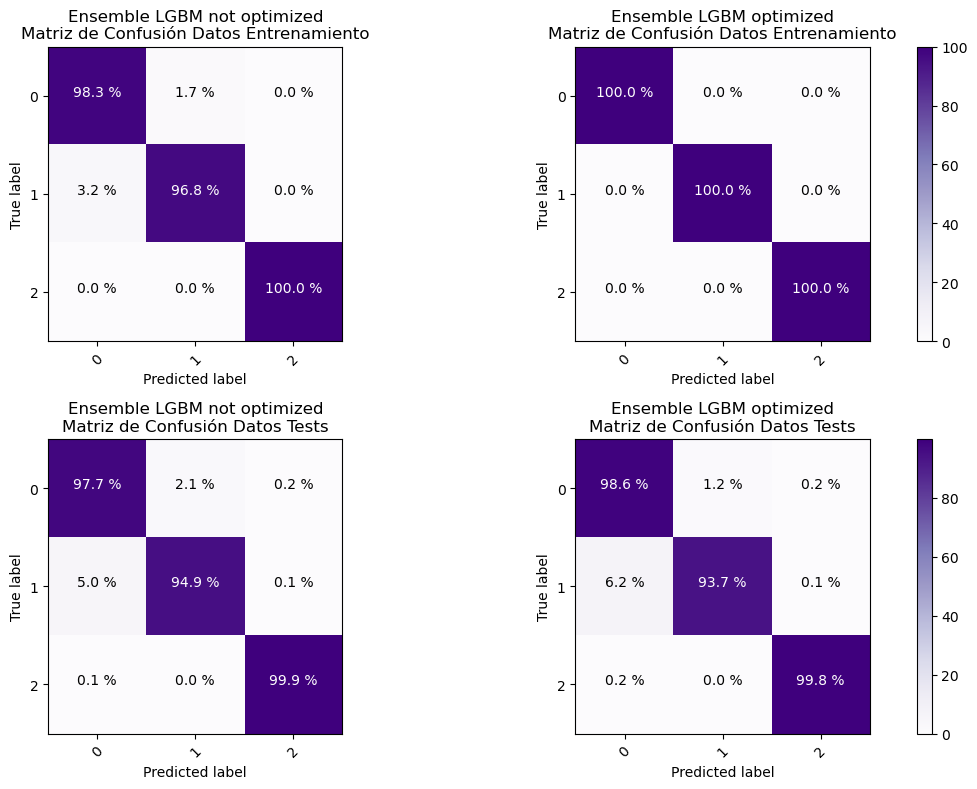

In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


msc = list()
for k, v in modelosEnsemble.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    cm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    model['confusion_matrix_train'] = (cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]) * 100
    model['confusion_matrix_test'] = (cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]) * 100
    msc.append(model)


def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Purples):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.1f} %'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plt.figure(figsize=(15, 8))
for i, mc in enumerate(msc):
    plt.subplot(2, 2, i+1)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['0', '1', '2'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    plt.subplot(2, 2, i+3)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['0', '1', '2'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

In [16]:
predLGBM = modelosEnsemble['Ensemble LGBM optimized'].predict(X)

Hacemos ya las predicciones con LGBM pues se van a normalizar los datos para utilizar Redes Neuronales.

<hr>

### 7. PREPARACIÓN DE LOS DATOS PARA SER UTILIZADOS POR REDES NEURONALES



In [17]:
from sklearn.preprocessing import MinMaxScaler

classValues = dataframe['class'].values

le = preprocessing.LabelEncoder()     
classLabelized = le.fit_transform(classValues)

dataframe['class'] = classLabelized

target_col = 'class'
features_cols = dataframe.loc[:, dataframe.columns != target_col].columns.tolist()

min_max_scaler = MinMaxScaler()
dataframe[features_cols] = min_max_scaler.fit_transform(dataframe[features_cols])
dataframe.sample(5)

,alpha,delta,u,g,r,i,z,field_ID,redshift,plate,MJD,fiber_ID,class
77202,0.380032,0.244145,0.998824,0.998722,0.395158,0.338613,0.998741,0.114519,0.023450,0.075401,0.142135,0.568569,0
49596,0.771495,0.582716,0.998942,0.998908,0.520367,0.459831,0.999053,0.115542,0.001356,0.207882,0.410841,0.284284,2
44660,0.450810,0.404053,0.999065,0.999008,0.519082,0.431548,0.998938,0.063395,0.074337,0.501669,0.644457,0.578579,0
44748,0.544966,0.533087,0.998820,0.998735,0.399178,0.340967,0.998750,0.509202,0.025118,0.142497,0.299153,0.226226,0
50154,0.317345,0.596964,0.998867,0.998888,0.521761,0.462297,0.999060,0.202454,0.001377,0.198274,0.347624,0.573574,2


In [18]:
X = dataframe[features_cols]
y = dataframe[target_col]

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<hr>

### 8. OPTIMIZACIÓN DE HIPERPARÁMETROS PARA REDES NEURONALES



In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


def create_model(trial):
    """Función para crear un modelo de red neuronal"""
    
    MIN_NEURONS = 4
    MAX_NEURONS = 1024
    

    n_layers = trial.suggest_int("n_layers", 1, 8)
    

    dropout = trial.suggest_float("dropout", 0.05, 0.25)
    

    model = Sequential()
    

    num_first_layer = trial.suggest_int("n_units_0", MIN_NEURONS, MAX_NEURONS)
    model.add(Dense(num_first_layer, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout))
    

    for i in range(n_layers):
        num_hidden = trial.suggest_int("n_units_{}".format(i+1), MIN_NEURONS, MAX_NEURONS)
        model.add(Dense(num_hidden, activation="relu"))
        #model.add(Dropout(dropout))
    

    model.add(Dense(3, activation='softmax'))
    return model

2023-04-16 10:56:56.430235: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 10:56:56.828782: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 10:56:56.830651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 10:56:58.148281: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [20]:
from tensorflow.keras import metrics

def callback(study, trial):

    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_model", value=trial.user_attrs["best_model"])


def objective(trial, X_train, y_train, X_test, y_test):

    model = create_model(trial)
    

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

    model.fit(X_train,
              y_train,
              validation_data=(X_test, y_test),
              epochs=50,
              batch_size=int(X_train.shape[0]/100),
              class_weight={0: (1 / np.count_nonzero(y_train == 0)) * (len(y_train) / 2.0),
                            1: (1 / np.count_nonzero(y_train == 1)) * (len(y_train) / 2.0),
                            2: (1 / np.count_nonzero(y_train == 2)) * (len(y_train) / 2.0)},
              verbose=0)
    

    trial.set_user_attr(key="best_model", value=model)
    
      

    return precision_score(y_true=y_test, y_pred=np.argmax(model.predict(X_test), axis=-1), average = "macro")


In [21]:
trial = []
study = optuna.create_study(direction="maximize", study_name="MLP Tensorflow")
func = lambda trial: objective(trial=trial, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
study.optimize(func, n_trials=10, callbacks=[callback])

[I 2023-04-16 10:56:59,608] A new study created in memory with name: MLP Tensorflow
2023-04-16 10:56:59.671146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-16 10:56:59.986223: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


625/625 [==============================] - 1s 1ms/step


[I 2023-04-16 10:58:31,035] Trial 0 finished with value: 0.9561151306287394 and parameters: {'n_layers': 4, 'dropout': 0.21305246179567217, 'n_units_0': 728, 'n_units_1': 502, 'n_units_2': 254, 'n_units_3': 595, 'n_units_4': 273}. Best is trial 0 with value: 0.9561151306287394.


625/625 [==============================] - 1s 1ms/step


[I 2023-04-16 11:00:20,330] Trial 1 finished with value: 0.9610435635590195 and parameters: {'n_layers': 8, 'dropout': 0.08169448222886819, 'n_units_0': 288, 'n_units_1': 901, 'n_units_2': 397, 'n_units_3': 410, 'n_units_4': 170, 'n_units_5': 17, 'n_units_6': 652, 'n_units_7': 138, 'n_units_8': 160}. Best is trial 1 with value: 0.9610435635590195.


625/625 [==============================] - 1s 2ms/step


[I 2023-04-16 11:03:05,499] Trial 2 finished with value: 0.9558311781832675 and parameters: {'n_layers': 6, 'dropout': 0.06946533180688114, 'n_units_0': 186, 'n_units_1': 74, 'n_units_2': 759, 'n_units_3': 907, 'n_units_4': 686, 'n_units_5': 318, 'n_units_6': 552}. Best is trial 1 with value: 0.9610435635590195.


625/625 [==============================] - 0s 657us/step


[I 2023-04-16 11:03:29,577] Trial 3 finished with value: 0.9571296179959462 and parameters: {'n_layers': 2, 'dropout': 0.24840976244877844, 'n_units_0': 486, 'n_units_1': 88, 'n_units_2': 190}. Best is trial 1 with value: 0.9610435635590195.


625/625 [==============================] - 1s 844us/step


[I 2023-04-16 11:04:21,872] Trial 4 finished with value: 0.9441101366810694 and parameters: {'n_layers': 3, 'dropout': 0.07433778520635932, 'n_units_0': 787, 'n_units_1': 8, 'n_units_2': 358, 'n_units_3': 781}. Best is trial 1 with value: 0.9610435635590195.


625/625 [==============================] - 1s 2ms/step


[I 2023-04-16 11:06:25,314] Trial 5 finished with value: 0.9344826107525375 and parameters: {'n_layers': 8, 'dropout': 0.13672712817241617, 'n_units_0': 493, 'n_units_1': 49, 'n_units_2': 456, 'n_units_3': 422, 'n_units_4': 203, 'n_units_5': 640, 'n_units_6': 326, 'n_units_7': 668, 'n_units_8': 441}. Best is trial 1 with value: 0.9610435635590195.


625/625 [==============================] - 1s 958us/step


[I 2023-04-16 11:07:32,502] Trial 6 finished with value: 0.9535721781709253 and parameters: {'n_layers': 3, 'dropout': 0.12690330114162807, 'n_units_0': 385, 'n_units_1': 114, 'n_units_2': 673, 'n_units_3': 618}. Best is trial 1 with value: 0.9610435635590195.


625/625 [==============================] - 2s 2ms/step


[I 2023-04-16 11:11:44,467] Trial 7 finished with value: 0.9538071806532632 and parameters: {'n_layers': 8, 'dropout': 0.17761406907789362, 'n_units_0': 1013, 'n_units_1': 976, 'n_units_2': 592, 'n_units_3': 557, 'n_units_4': 95, 'n_units_5': 241, 'n_units_6': 70, 'n_units_7': 713, 'n_units_8': 873}. Best is trial 1 with value: 0.9610435635590195.


625/625 [==============================] - 1s 2ms/step


[I 2023-04-16 11:13:50,279] Trial 8 finished with value: 0.9588203404394154 and parameters: {'n_layers': 6, 'dropout': 0.23382670699719993, 'n_units_0': 570, 'n_units_1': 1007, 'n_units_2': 87, 'n_units_3': 580, 'n_units_4': 16, 'n_units_5': 633, 'n_units_6': 649}. Best is trial 1 with value: 0.9610435635590195.


625/625 [==============================] - 1s 2ms/step


[I 2023-04-16 11:17:15,045] Trial 9 finished with value: 0.9566103944912285 and parameters: {'n_layers': 7, 'dropout': 0.08291539089111383, 'n_units_0': 125, 'n_units_1': 721, 'n_units_2': 959, 'n_units_3': 590, 'n_units_4': 789, 'n_units_5': 267, 'n_units_6': 402, 'n_units_7': 304}. Best is trial 1 with value: 0.9610435635590195.


In [22]:
print("Number of finished trials: {}".format(len(study.trials)))


print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("\t{}: {}".format(key, value))

Number of finished trials: 10
Best trial:
  Value: 0.9610435635590195
  Params: 
	n_layers: 8
	dropout: 0.08169448222886819
	n_units_0: 288
	n_units_1: 901
	n_units_2: 397
	n_units_3: 410
	n_units_4: 170
	n_units_5: 17
	n_units_6: 652
	n_units_7: 138
	n_units_8: 160


<hr>

### 9. ENTRENAMIENTO DE LA RNN OPTIMIZADA Y LA RNN MANUAL CON MEJOR RENDIMIENTO



In [23]:
best_model=study.user_attrs["best_model"]

Modelo RNN de la práctica anterior

In [24]:
from tensorflow.keras import metrics

class_weights = {0: (1 / np.count_nonzero(y_train == 0)) * (len(y_train) / 2.0),
                 1: (1 / np.count_nonzero(y_train == 1)) * (len(y_train) / 2.0),
                 2: (1 / np.count_nonzero(y_train == 2)) * (len(y_train) / 2.0)}

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, 
          batch_size=int(X_train.shape[0]/100), verbose=2, class_weight = class_weights)

Epoch 1/50
100/100 - 1s - loss: 1.0291 - accuracy: 0.5807 - val_loss: 0.3885 - val_accuracy: 0.8807 - 952ms/epoch - 10ms/step
Epoch 2/50
100/100 - 0s - loss: 0.4214 - accuracy: 0.8952 - val_loss: 0.2870 - val_accuracy: 0.9017 - 310ms/epoch - 3ms/step
Epoch 3/50
100/100 - 0s - loss: 0.3775 - accuracy: 0.9064 - val_loss: 0.2491 - val_accuracy: 0.9216 - 310ms/epoch - 3ms/step
Epoch 4/50
100/100 - 0s - loss: 0.3244 - accuracy: 0.9263 - val_loss: 0.2420 - val_accuracy: 0.9248 - 311ms/epoch - 3ms/step
Epoch 5/50
100/100 - 0s - loss: 0.3517 - accuracy: 0.9163 - val_loss: 0.2323 - val_accuracy: 0.9316 - 310ms/epoch - 3ms/step
Epoch 6/50
100/100 - 0s - loss: 0.2983 - accuracy: 0.9327 - val_loss: 0.2073 - val_accuracy: 0.9405 - 308ms/epoch - 3ms/step
Epoch 7/50
100/100 - 0s - loss: 0.2979 - accuracy: 0.9330 - val_loss: 0.2152 - val_accuracy: 0.9340 - 306ms/epoch - 3ms/step
Epoch 8/50
100/100 - 0s - loss: 0.2821 - accuracy: 0.9381 - val_loss: 0.1952 - val_accuracy: 0.9439 - 306ms/epoch - 3ms/step

In [25]:
modelosRNN = {
    'RNN not optimized':model,
    'RNN optimized':best_model 
}

evaluacion = list()
for k, v in modelosRNN.items():
    print ('EVALUANDO MODELO: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_prob = v.predict(X)
    y_pred = np.argmax(v.predict(X), axis=-1)
    model['accuracy'] = accuracy_score(y_true=y, y_pred=y_pred)
    model['precision'] = precision_score(y_true=y, y_pred=y_pred, average = "macro")
    model['recall'] = recall_score(y_true=y, y_pred=y_pred, average = "macro")
    model['f1'] = f1_score(y_true=y, y_pred=y_pred, average = "macro")
    evaluacion.append(model)

df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

EVALUANDO MODELO: RNN not optimized
3125/3125 [==============================] - 2s 594us/step
EVALUANDO MODELO: RNN optimized
3125/3125 [==============================] - 5s 1ms/step


,accuracy,precision,recall,f1
name,,,,
RNN not optimized,0.96412,0.956123,0.962792,0.959300
RNN optimized,0.96862,0.964073,0.964639,0.964156


Obteniendo Matriz de Confusión de: RNN not optimized
625/625 [==============================] - 0s 562us/step
Obteniendo Matriz de Confusión de: RNN optimized
625/625 [==============================] - 1s 1ms/step


/tmp/ipykernel_3962/3444937147.py:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)
/tmp/ipykernel_3962/3444937147.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+3)


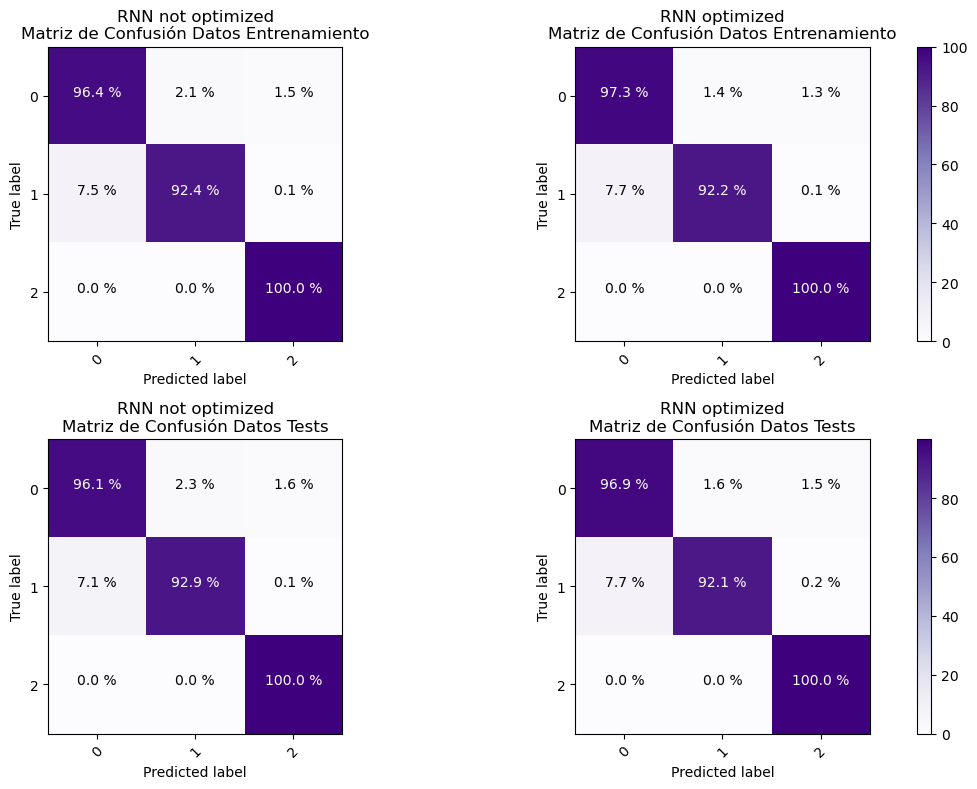

In [26]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

msc = list()
for k, v in modelosRNN.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_prob_train = v.predict(X_train)
    y_prob_test = v.predict(X_test)
    y_pred_train = np.argmax(v.predict(X_train), axis=-1)
    y_pred_test = np.argmax(v.predict(X_test), axis=-1)
    cm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    model['confusion_matrix_train'] = (cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]) * 100
    model['confusion_matrix_test'] = (cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]) * 100
    msc.append(model)

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.1f} %'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plt.figure(figsize=(15, 8))
for i, mc in enumerate(msc):
    plt.subplot(2, 2, i+1)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['0', '1', '2'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    plt.subplot(2, 2, i+3)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['0', '1', '2'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

In [27]:
predRNN = np.argmax(modelosRNN['RNN optimized'].predict(X), axis=-1)

3125/3125 [==============================] - 5s 1ms/step


<hr>

### 10. CONCLUSIONES



* El conjunto de datos empleado tiene un gran desbalanceo de las clases a predecir, por lo que se ha utilizado class weights.
* Todas las columnas del dataset son de tipo numérico excepto la clase a predecir, por lo que se tiene que utilizar un LabelEncoder para pasar de una etiqueta de texto a una etiqueta numérica para poder emplear árboles de decisión y Ensemble.
* En caso de redes neuronales, se debe normalizar el dataset previo a la utilización de las redes.
* Se ha escogido optimizar los modelos en función de la métrica de precisión, pues he considerado más importante optimizar el acierto de las predicciones, minimizando los falsos positivos. Siendo un problema que trata el tema del espacio, imaginemos que se quiere mandar una sonda para obtener datos de una galaxia, no de una estrella o cuásar. Disminuyendo la tasa de falsos positivos, se asegura que es más complicado que un objeto identificado como galaxia no sea galaxia.
* En caso del método Ensemble LGBM, se obtiene una mejora del accuracy del 1.2%.
* En caso de las Redes Neuronales, se obtiene una mejora del accuracy de 0.45%.
* Para las Redes Neuronales, se ha optado por no dejar al optimizador utilizar regularización, pues siempre que empleaba regularización obtenía peores resultados que el modelo sin optimizar.
* Se puede apreciar como Optuna escoge valores para los hiperparámetros que no serían escogidos nunca a primera vista. Un ejemplo de ello es "learning_rate: 0.2537601369581455", en el metamodelo LGBM, pues utiliza un número con muchos decimales.
* A pesar de que se hayan obtenido mejores modelos, la optimización con Optuna requiere más tiempo. Esto ha sido sobretodo evidente en el caso de las RNN, pues no he podido utilizar la GPU con Optuna, pues mostraba un error de acceso a ficheros inexistentes (parece que accedía a la RAM de la CPU en vez de a la de la GPU, donde se había ejecutado el modelo).
* Como se puede ver, Optuna ha logrado unos modelos excelentes, con unas métricas de accuracy, precision, recall y F1 muy altas. Además, en ambos casos el uso de Optuna ha logrado un modelo mejor que el realizado manualmente.
* A pesar de los excelentes resultados, el factor del tiempo de ejecución se debe tener en cuenta, puesto que utilizar este método de optimización puede llevar mucho tiempo, especialmente si se decide hacer un número de pruebas elevado.

Se van a realizar ahora las predicciones sobre todos los datos del dataframe, empleando los modelos LGBM y RNN obtenidos gracias a Optuna.

<hr>

### 11. PREDICCIÓN CON LOS MODELOS OPTIMIZADOS



In [28]:
dataframe['predLGBM'] = predLGBM
dataframe['RNN'] = predRNN

dataframe.head(20)

,alpha,delta,u,g,r,i,z,field_ID,redshift,plate,MJD,fiber_ID,class,predLGBM,RNN
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.069530,0.091831,0.451592,0.648007,0.170170,0,0,0
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.110429,0.112389,0.828841,0.894320,0.426426,0,0,0
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.111452,0.093170,0.350949,0.543965,0.298298,0,0,0
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.207566,0.134210,0.723312,0.878072,0.774775,0,0,0
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.128834,0.017959,0.476753,0.625205,0.841842,0,0,0
5,0.947208,0.386840,0.999074,0.999176,0.582279,0.475761,0.999019,0.101227,0.204328,0.387591,0.579874,0.740741,1,1,1
6,0.064527,0.296736,0.998872,0.998961,0.562346,0.491292,0.999107,0.461145,0.084946,0.879651,0.935008,0.112112,1,1,1
7,0.015077,0.303092,0.998950,0.999045,0.532623,0.441877,0.998950,0.342536,0.069358,0.481801,0.628345,0.014014,0,0,0
8,0.556356,0.648270,0.999165,0.999078,0.546246,0.440860,0.998960,0.099182,0.095423,0.517792,0.652376,0.718719,0,0,0
9,0.108736,0.460655,0.998900,0.998847,0.473598,0.412337,0.998930,0.113497,0.001419,0.177347,0.337794,0.231231,2,2,2


Como se puede ver en esta pequeña muestra, LGBM y RNN han acertado en estas primeras veinte predicciones.